# EDA-鐵達尼號 
大多數的資料為原始資料，可能存在許多問題，比如樣本分配不均、無完整數據(空值)、離群值、非常態分布...，我們必須找出，並進行處理。

可以透過Exploratory Data Analysis(EDA，資料探索)尋找資料中的問題並進行清理。資料探索分為統計圖表，資料清理。

統計圖表:
![](https://github.com/Yi-Huei/bin/blob/master/images/EDA.png?raw=true)  

本篇透過Seaborn所提供之鐵達尼號資料集，進行資料探索與清理。最後進行機器學習

## 一、載入資料
[資料來源與說明](https://www.kaggle.com/c/titanic/data)  
(1).載入資料集  
(2).查看資料  
(3).描敘性統計(連續資料、類別資料)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


從資料來看第0攔為生存與否，為y  
第1~14攔為特徵，為x  

具有空值的欄位為第3欄(age)、第7欄(embarked)、第11欄(deck)、第12欄(embark_town)

各欄位的資料型別不一

In [4]:
# 描述性統計_連續資料
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# 描述性統計_類別資料，include='O'，O為object資料型別
df.describe(include='O').transpose()

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
who,891,3,man,537
embark_town,889,3,Southampton,644
alive,891,2,no,549


## 二、遺漏值（Missing value）處理
(1).檢查遺漏值項目與筆數  
(2).刪除遺漏值(欄或列刪除)  
(3).填補遺漏值_中位數填補  
(4).填補遺漏值_前一筆或後一筆資料填補

In [6]:
#檢查遺漏值
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

age、deck、emback_town三個欄位具有遺失值。

In [7]:
df.isnull().sum().sum()

869

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

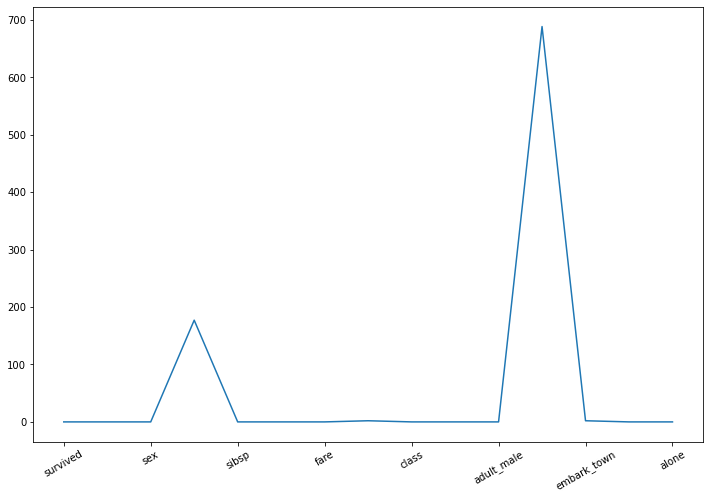

In [8]:
# 顯示遺失值圖形
plt.figure(figsize=(12, 8)) #設定圖片寬高
df.isnull().sum().plot()
plt.xticks(rotation=30) #旋轉X軸標籤(橫式轉30度)

In [9]:
# 處理遺失值: 刪除欄或列(drop函數)
'''
drop函數之參數
axis: 0為列  1為欄
deck: 欄標題
inplace: True直接更新deck欄
    本例相當於: df['deck'] = df.drop('deck', axis=1)
'''
df.drop('deck', axis=1, inplace=True)  #deck遺失值佔688/891，故採整欄刪除
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [10]:
# 補中位數 median
# age欄位之遺失值占177/891，遺失值的部分使用中位數做遞補
df['age'].fillna(df['age'].median(), inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [11]:
# 搜尋embark_town為空值的數據
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


第61與829 embark_town為空值

In [12]:
#查詢前一筆資料
df.iloc[[60,828]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
828,1,3,male,28.0,0,0,7.7500,Q,Third,man,True,Queenstown,yes,True


In [13]:
# embark_town(登船港口)遺失值比例2/891
# 資料收集順序為登船港口，可以補"前一筆"或"後一筆"
# fillna內參數method之'ffill'表示補前一筆，'dfill'表示補後一筆
df['embark_town'].fillna(method='ffill', inplace=True)
df.iloc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,Queenstown,yes,True


In [14]:
# 查看後一筆資料
df.iloc[[61+1,829+1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,Southampton,no,False
830,1,3,female,15.0,1,0,14.4542,C,Third,child,False,Cherbourg,yes,False


In [15]:
# 補後一筆
# 若下一筆也是null時，會補下下一筆
df['embarked'].fillna(method='bfill', inplace=True)
df.iloc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,C,First,woman,False,Queenstown,yes,True


## 三、刪除重複數據(Remove duplicate rows)
(1).檢查重複數據  
    **若重複數據過多，不建議刪除  

(2).刪除重複數據

In [16]:
# 檢測重複數據
# subset指定 age欄位是否重複
df[df.duplicated(subset=['age'])]

#刪除資料
#df_deplicate = df.drop_duplicates(subset=['age'])
#df_deplicate

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
17,1,2,male,28.0,0,0,13.0000,S,Second,man,True,Southampton,yes,True
19,1,3,female,28.0,0,0,7.2250,C,Third,woman,False,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


相同年齡資料，803筆資料->不進行處理

In [17]:
# subset指定 age, parch, sex, embark_town 欄位是否重複
df[df.duplicated(subset=['age', 'parch', 'sex', 'embark_town'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,Southampton,no,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
29,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False
32,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False


age, parch, sex, embark_town 欄位完全相同資料553筆 -> 不處理

## 四、轉換欄位資料型態
**Transform column data type**
(1).查看那些欄位是非數值類型  
(2).查看該欄位數值為何，使用函數為unique  
(3).進行轉換工程，使用函數為map

**資料轉數值時，應思考y(生存率)高低，依生存率低到高，排列0~

In [18]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
survicedSex = df.groupby(by='sex').agg('survived').mean()
print(survicedSex)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


女性生存率高於男性，可以將sex欄coding為  
female = 1  
male  = 0

In [20]:
# 將性別欄位轉成int，男性為0，女性為1
# 函數map轉數值， 函數astype轉型別
df['sex'] = df['sex'].map({'male':0, 'female':1}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
# 查看Class欄位內資料
df['class'].unique()

[Third, First, Second]
Categories (3, object): [Third, First, Second]

In [22]:
survicedClass = df.groupby(by='class').agg('survived').mean()
survicedClass

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

生存率: First > Second > Third  
可coding為 2 1 0

In [23]:
# class欄位轉換
df['class'] = df['class'].map({'First':2, 'Second':1, 'Third':0}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,0,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,2,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,0,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,2,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,0,man,True,Southampton,no,True


In [24]:
# who欄位轉換
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [25]:
survicedWho = df.groupby(by='who').agg('survived').mean()
survicedWho

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

生存率: woman > child > man
可coding為 2 1 0

In [26]:
df['who'] = df['who'].map({'man':0, 'woman':2, 'child':1}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,0,0,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,2,2,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,0,2,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,2,2,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,0,0,True,Southampton,no,True


In [27]:
# embarked欄位轉換
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
survicedEmbarked = df.groupby(by='embarked').agg('survived').mean()
survicedEmbarked 

embarked
C    0.556213
Q    0.389610
S    0.337984
Name: survived, dtype: float64

In [29]:
df['embarked'] = df['embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,0,0,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,2,2,2,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,0,2,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,2,2,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,0,0,True,Southampton,no,True


In [30]:
# embark_town欄位轉換
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [31]:
df['embark_town'] = df['embark_town'].map({'Southampton':0, 'Queenstown':1, 'Cherbourg':2}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,0,0,True,0,no,False
1,1,1,1,38.0,1,0,71.2833,2,2,2,False,2,yes,False
2,1,3,1,26.0,0,0,7.9250,0,0,2,False,0,yes,True
3,1,1,1,35.0,1,0,53.1000,0,2,2,False,0,yes,False
4,0,3,0,35.0,0,0,8.0500,0,0,0,True,0,no,True


In [32]:
# alive欄位轉換
df['alive'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
df['alive'] = df['alive'].map({'no':0, 'yes':1}).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,0,0,True,0,0,False
1,1,1,1,38.0,1,0,71.2833,2,2,2,False,2,1,False
2,1,3,1,26.0,0,0,7.9250,0,0,2,False,0,1,True
3,1,1,1,35.0,1,0,53.1000,0,2,2,False,0,1,False
4,0,3,0,35.0,0,0,8.0500,0,0,0,True,0,0,True


## 五、連續欄位轉成類別欄位
(1).將年齡轉成小孩、少年、青年、成年、壯年、中年、老年  
(2).labels數字應正比於生存率

In [34]:
#將年齡轉成小孩、少年、成年、壯年、中壯年、中年、老年
bins = [0, 12, 18, 25, 35, 50, 70, 100]
cats = pd.cut(df.age, bins, labels=['小孩', '少年', '成年', '壯年', '中壯年', '中年', '老年'])
cats.head()

0     成年
1    中壯年
2     壯年
3     壯年
4     壯年
Name: age, dtype: category
Categories (7, object): [小孩 < 少年 < 成年 < 壯年 < 中壯年 < 中年 < 老年]

In [35]:
#填入新欄位
df['nAge'] = cats
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,nAge
0,0,3,0,22.0,1,0,7.2500,0,0,0,True,0,0,False,成年
1,1,1,1,38.0,1,0,71.2833,2,2,2,False,2,1,False,中壯年
2,1,3,1,26.0,0,0,7.9250,0,0,2,False,0,1,True,壯年
3,1,1,1,35.0,1,0,53.1000,0,2,2,False,0,1,False,壯年
4,0,3,0,35.0,0,0,8.0500,0,0,0,True,0,0,True,壯年


In [36]:
# 查看不同年齡層之生存率、排序
survivedAge = df.groupby(by='nAge').agg('survived').mean()
rank = survivedAge.rank(ascending=1,method='dense')-1
pd.DataFrame([survivedAge,rank])

nAge,小孩,少年,成年,壯年,中壯年,中年,老年
survived,0.57971,0.428571,0.333333,0.36193,0.398693,0.355932,0.2
survived,6.00000,5.000000,1.000000,3.00000,4.000000,2.000000,0.0


In [37]:
# 依照生存率高低進行coding
catsAge = pd.cut(df.age, bins, labels=[5, 6, 2, 3, 4, 1, 0])
df['age'] = catsAge

df['nAge'] = df['nAge'].map({'小孩':6, '少年':5, '成年':2, '壯年':3, '中壯年':4, '中年':1, '老年':0}).astype(int)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,nAge
0,0,3,0,2,1,0,7.2500,0,0,0,True,0,0,False,2
1,1,1,1,4,1,0,71.2833,2,2,2,False,2,1,False,4
2,1,3,1,3,0,0,7.9250,0,0,2,False,0,1,True,3
3,1,1,1,3,1,0,53.1000,0,2,2,False,0,1,False,3
4,0,3,0,3,0,0,8.0500,0,0,0,True,0,0,True,3


## 六、相關係數
(1).斜對角不要看(自己對自己之相關係數)  
(2).上三角與下三角一樣  
(3).-1~1之間  
(4).倆倆欄位相關係數過大，表示兩者過於相關，應移除其中一個欄位

In [38]:
df.corr()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,nAge
survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257307,0.170943,0.338481,0.559169,-0.557080,0.172726,1.000000,-0.203367,0.114545
pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.166223,-1.000000,-0.140959,0.094035,-0.168430,-0.338481,0.135207,0.115537
sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182333,0.111894,0.131900,0.947612,-0.908578,0.113807,0.543351,-0.303646,0.117420
sibsp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159651,-0.069444,-0.083081,0.161172,-0.253586,-0.070111,-0.035322,-0.584471,0.275244
parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216225,-0.041064,-0.018443,0.265765,-0.349943,-0.041732,0.081629,-0.583398,0.305553
fare,0.257307,-0.549500,0.182333,0.159651,0.216225,1.000000,0.227015,0.549500,0.195794,-0.182024,0.228364,0.257307,-0.271832,0.016492
embarked,0.170943,-0.166223,0.111894,-0.069444,-0.041064,0.227015,1.000000,0.166223,0.100056,-0.095837,0.995535,0.170943,-0.061111,-0.013857
class,0.338481,-1.000000,0.131900,-0.083081,-0.018443,0.549500,0.166223,1.000000,0.140959,-0.094035,0.168430,0.338481,-0.135207,-0.115537
who,0.559169,-0.140959,0.947612,0.161172,0.265765,0.195794,0.100056,0.140959,1.000000,-0.955401,0.102083,0.559169,-0.326386,0.123763
adult_male,-0.557080,0.094035,-0.908578,-0.253586,-0.349943,-0.182024,-0.095837,-0.094035,-0.955401,1.000000,-0.097575,-0.557080,0.404744,-0.308452


In [39]:
# highlight大於0.8和小於-0.8
def highlight_value(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >= 0.8 or val <= -0.8 else 'black'
    return 'color: %s' % color

df.corr().style.applymap(highlight_value)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,nAge
survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257307,0.170943,0.338481,0.559169,-0.557080,0.172726,1.000000,-0.203367,0.114545
pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.166223,-1.000000,-0.140959,0.094035,-0.168430,-0.338481,0.135207,0.115537
sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182333,0.111894,0.131900,0.947612,-0.908578,0.113807,0.543351,-0.303646,0.117420
sibsp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159651,-0.069444,-0.083081,0.161172,-0.253586,-0.070111,-0.035322,-0.584471,0.275244
parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216225,-0.041064,-0.018443,0.265765,-0.349943,-0.041732,0.081629,-0.583398,0.305553
fare,0.257307,-0.549500,0.182333,0.159651,0.216225,1.000000,0.227015,0.549500,0.195794,-0.182024,0.228364,0.257307,-0.271832,0.016492
embarked,0.170943,-0.166223,0.111894,-0.069444,-0.041064,0.227015,1.000000,0.166223,0.100056,-0.095837,0.995535,0.170943,-0.061111,-0.013857
class,0.338481,-1.000000,0.131900,-0.083081,-0.018443,0.549500,0.166223,1.000000,0.140959,-0.094035,0.168430,0.338481,-0.135207,-0.115537
who,0.559169,-0.140959,0.947612,0.161172,0.265765,0.195794,0.100056,0.140959,1.000000,-0.955401,0.102083,0.559169,-0.326386,0.123763
adult_male,-0.557080,0.094035,-0.908578,-0.253586,-0.349943,-0.182024,-0.095837,-0.094035,-0.955401,1.000000,-0.097575,-0.557080,0.404744,-0.308452


In [40]:
df.corr().style.applymap(lambda x: 'color: red' if x>=0.8 else 'color: black')

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,nAge
survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257307,0.170943,0.338481,0.559169,-0.557080,0.172726,1.000000,-0.203367,0.114545
pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.166223,-1.000000,-0.140959,0.094035,-0.168430,-0.338481,0.135207,0.115537
sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182333,0.111894,0.131900,0.947612,-0.908578,0.113807,0.543351,-0.303646,0.117420
sibsp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159651,-0.069444,-0.083081,0.161172,-0.253586,-0.070111,-0.035322,-0.584471,0.275244
parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216225,-0.041064,-0.018443,0.265765,-0.349943,-0.041732,0.081629,-0.583398,0.305553
fare,0.257307,-0.549500,0.182333,0.159651,0.216225,1.000000,0.227015,0.549500,0.195794,-0.182024,0.228364,0.257307,-0.271832,0.016492
embarked,0.170943,-0.166223,0.111894,-0.069444,-0.041064,0.227015,1.000000,0.166223,0.100056,-0.095837,0.995535,0.170943,-0.061111,-0.013857
class,0.338481,-1.000000,0.131900,-0.083081,-0.018443,0.549500,0.166223,1.000000,0.140959,-0.094035,0.168430,0.338481,-0.135207,-0.115537
who,0.559169,-0.140959,0.947612,0.161172,0.265765,0.195794,0.100056,0.140959,1.000000,-0.955401,0.102083,0.559169,-0.326386,0.123763
adult_male,-0.557080,0.094035,-0.908578,-0.253586,-0.349943,-0.182024,-0.095837,-0.094035,-0.955401,1.000000,-0.097575,-0.557080,0.404744,-0.308452


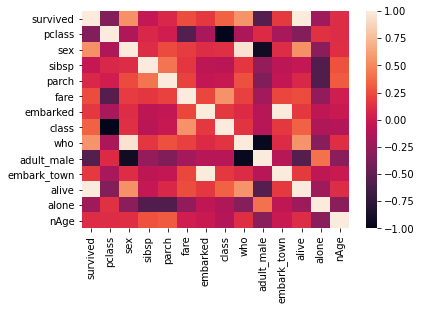

In [41]:
# 透過熱力圖查看特徵間的相關度
sns.heatmap(df.corr())

顏色越淺與越深都代表相關度大

In [42]:
# 兩兩相關係數過大，保留其一
df.drop(['alive', 'adult_male', 'who', 'embark_town', 'class','age'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,alone,nAge
0,0,3,0,1,0,7.2500,0,False,2
1,1,1,1,1,0,71.2833,2,False,4
2,1,3,1,0,0,7.9250,0,True,3
3,1,1,1,1,0,53.1000,0,False,3
4,0,3,0,0,0,8.0500,0,True,3


## 七、深度學習
(1).欄位資料分為 y 與X  
(2).列資料分為訓練資料與測試資料  
(3).標準化  
(4).選擇演算法  
(5).訓練  
(6).準確度

In [43]:
# 資料分為 y 與 X
y = df.survived #y為第一欄survived
X = df.iloc[:, 1:] #X為所有列，第一欄不要

In [44]:
# 分割為訓練資料與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train.head()

,pclass,sex,sibsp,parch,fare,embarked,alone,nAge
263,1,0,0,0,0.0000,0,True,4
529,2,0,2,1,11.5000,0,False,2
516,2,1,0,0,10.5000,0,True,3
460,1,0,0,0,26.5500,0,True,4
876,3,0,0,0,9.8458,0,True,2


In [45]:
#票價fare做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.fare = scaler.fit_transform(X_train['fare'][:, np.newaxis])[:, 0]



C:\Anacoda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
X_train.fare

263   -0.628160
529   -0.402538
516   -0.422158
460   -0.107268
876   -0.434993
         ...   
449   -0.029772
16    -0.056748
411   -0.493605
750   -0.176916
525   -0.476111
Name: fare, Length: 712, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_train.fare = scaler.fit_transform(X_train['fare'][:, np.newaxis])[:, 0]
# X_test.fare = scaler.transform(X_test['fare'][:, np.newaxis])[:, 0]

scaler.fit(np.array(X_train['fare']).reshape((X_train.shape[0], 1)))
X_train['fare']= scaler.transform(np.array(X_train['fare']).reshape((X_train.shape[0], 1)))
X_train.head()

<ipython-input-47-92700979f968>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fare']= scaler.transform(np.array(X_train['fare']).reshape((X_train.shape[0], 1)))


,pclass,sex,sibsp,parch,fare,embarked,alone,nAge
263,1,0,0,0,-0.628160,0,True,4
529,2,0,2,1,-0.402538,0,False,2
516,2,1,0,0,-0.422158,0,True,3
460,1,0,0,0,-0.107268,0,True,4
876,3,0,0,0,-0.434993,0,True,2


In [48]:
#選擇演算法:LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#訓練
clf.fit(X_train, y_train)

LogisticRegression()

In [49]:
# 生存機率
clf.predict_proba(X_test[:10])

array([[3.92820313e-01, 6.07179687e-01],
       [3.92820313e-01, 6.07179687e-01],
       [7.11976562e-03, 9.92880234e-01],
       [5.30665812e-01, 4.69334188e-01],
       [7.62579928e-01, 2.37420072e-01],
       [7.96370862e-01, 2.03629138e-01],
       [8.25856305e-02, 9.17414370e-01],
       [9.07712054e-05, 9.99909229e-01],
       [2.79374996e-02, 9.72062500e-01],
       [3.61463480e-02, 9.63853652e-01]])

In [50]:
#打分數
clf.score(X_test, y_test)

0.6089385474860335

In [51]:
# 演算法:隨機森林 RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.6815642458100558

In [52]:
# 儲存模型
from joblib import dump, load
dump(clf2, '20201015.joblib')

['20201015.joblib']

In [53]:
# 儲存標準化
#dump(scaler,'20201015_std.joblib')
import pickle
fare_file_name='20201015_std.pickle'
with open(fare_file_name, 'wb') as f:
    pickle.dump(scaler, f)